In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import numpy as np

In [5]:
#16/03/2018

In [6]:
ph1=imread("ph1.jpg")
ph2=imread("ph2.jpg")
ph3=imread("ph3.jpg")
ph4=imread("ph4.jpg")

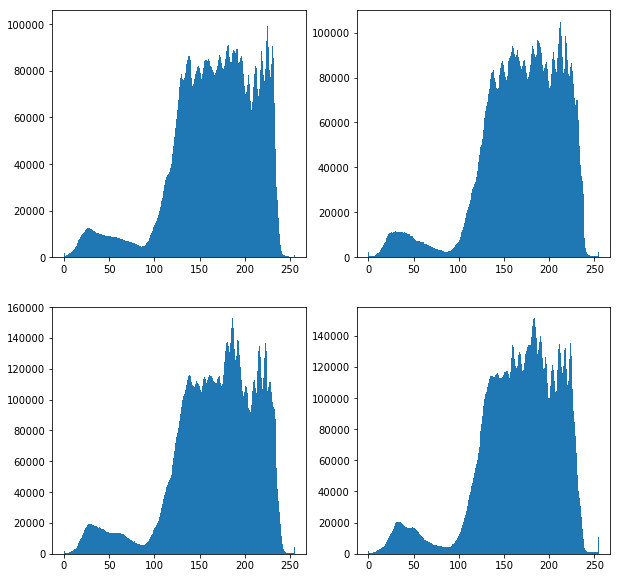

In [7]:
figure(figsize=(10,10))
subplot(2,2,1)
hist(ph1.reshape(-1), bins=255);
subplot(2,2,2)
hist(ph2.reshape(-1), bins=255);
subplot(2,2,3)
hist(ph3.reshape(-1), bins=255);
subplot(2,2,4)
hist(ph4.reshape(-1), bins=255);

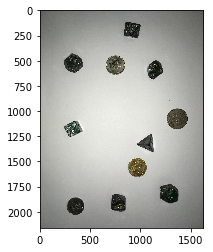

In [8]:
imshow(ph1)

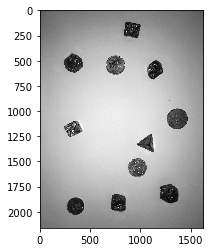

In [9]:
ar=np.zeros((ph1.shape[0],ph1.shape[1],3))
ar[:,:,0]=ph1[:,:,0]
ar[:,:,1]=ph1[:,:,1]
ar[:,:,2]=ph1[:,:,2]
ph1c=0.3*ar[:,:,0]+0.59*ar[:,:,1]+0.11*ar[:,:,2]
imshow(ph1c, cmap='gray')

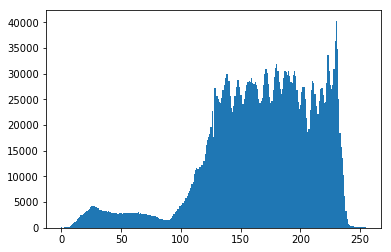

In [10]:
hist(ph1c.reshape(-1), bins=255);

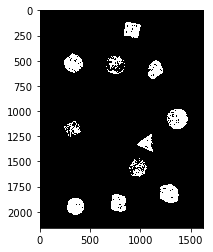

In [11]:
ph1c2=(ph1c<85).astype(np.float32)
imshow(ph1c2,cmap='gray')

In [12]:
print(ph1c2.shape)

(2160, 1620)


In [13]:
import cv2

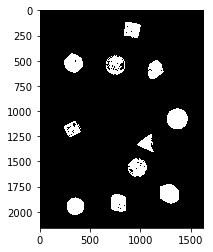

In [14]:
test1=cv2.dilate(ph1c2, np.ones((3,3)))
imshow(test1, cmap='gray')

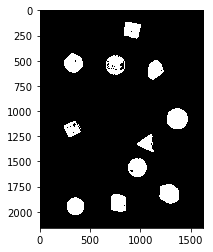

In [15]:
test2=cv2.dilate(test1, np.ones((3,3)))
imshow(test2, cmap='gray')

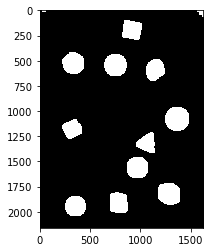

In [16]:
test3=cv2.dilate(ph1c2, np.ones((31,31)))
imshow(test3, cmap='gray')

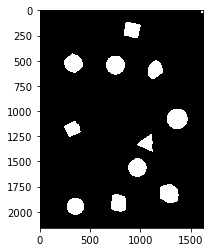

In [17]:
ph1w=cv2.erode(test3, np.ones((31,31)))
imshow(ph1w, cmap='gray')

In [18]:
wk=np.zeros(((ph1w.shape[0]+1),(ph1w.shape[1]+1)))
wk[1:,1:]=ph1w

count=2
colors={}
for j in range(1,wk.shape[0]):
    for i in range(1,wk.shape[1]):
        if wk[j,i]!=1:
            continue
        if wk[j,i]==1:
            if wk[j-1,i]==0 and wk[j, i-1]==0:
                wk[j,i]=count
                count+=1
            else:
                wk[j,i]=max(wk[j-1,i],wk[j,i-1])
                if min(wk[j-1,i],wk[j,i-1])>0 and wk[j-1,i]!=wk[j,i-1]:
                    a, b = wk[j-1,i],wk[j,i-1]
                    if a > b: a,b = b,a
                    colors[a]=colors.get(a,set())|{b}

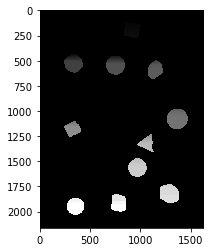

In [19]:
imshow(wk,cmap='gray')

In [20]:
for i in sorted(colors.keys(),reverse=True):
    for j in colors[i]:
        wk[wk==j]=i

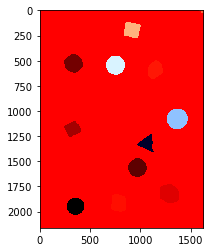

In [21]:
imshow(wk, cmap='flag')

In [22]:
imgg = (wk>0).astype(np.uint8)

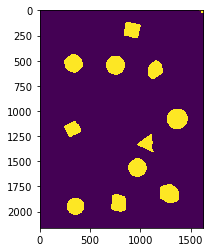

In [23]:
imshow(imgg)

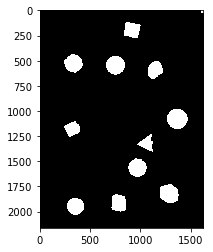

In [26]:
e1=cv2.erode(imgg, np.ones((3,3)))
imshow(e1, cmap='gray')

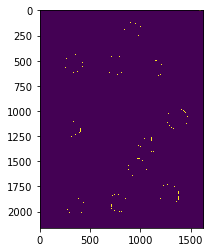

In [28]:
q1= e1-imgg
imshow(q1)

In [31]:
q2 = q1*wk

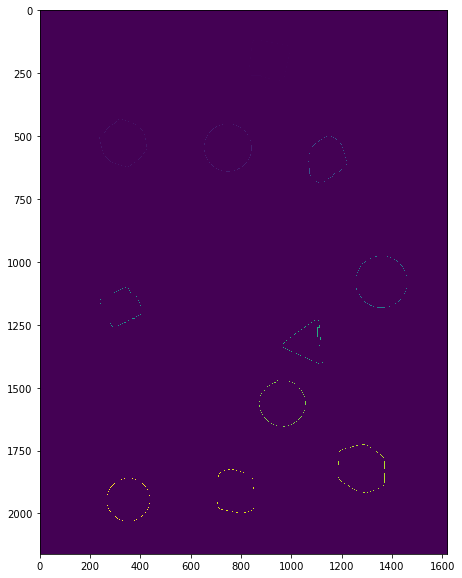

In [33]:
figure(figsize=(10,10))
imshow(q2,interpolation='nearest')

In [65]:
mass_of_colors = np.unique(q2)
mass_of_colors2 = np.unique(wk)

In [79]:
P = np.array([])
S = np.array([])
px = np.array([])
py = np.array([])
table = np.array([])
for i in mass_of_colors:
    P=np.append(P, np.sum(q2==i))
for i in mass_of_colors2:
    S=np.append(S, np.sum(wk==i))
    #argmax потому что 0 - это пусто
    px = np.append(px, np.max(np.argmax((wk==i), axis=1)) - np.min(np.argmax((wk==i), axis=1)))
    py = np.append(py, np.max(np.argmax((wk==i), axis=0)) - np.min(np.argmax((wk==i), axis=0)))
table=np.vstack((P,S,px,py, px/py, px*py, px*py/S, S/P, P/(2*(px+py))))
#print(np.shape(P), np.shape(S), np.shape(px), np.shape(py))


/home/stepan/programs/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in true_divide
/home/stepan/programs/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:13: RuntimeWarning: divide by zero encountered in true_divide


In [78]:
table[:,1:]

array([[  1.00000000e+00,   1.58000000e+02,   6.54000000e+02,
          7.56000000e+02,   7.54000000e+02,   6.88000000e+02,
          8.18000000e+02,   6.50000000e+02,   7.11000000e+02,
          7.36000000e+02,   7.54000000e+02,   6.40000000e+02,
          6.86000000e+02],
       [  1.00000000e+00,   1.13000000e+03,   2.10860000e+04,
          2.57530000e+04,   2.83010000e+04,   2.05760000e+04,
          3.35030000e+04,   1.69440000e+04,   1.52590000e+04,
          2.63340000e+04,   2.92330000e+04,   2.23910000e+04,
          2.32960000e+04],
       [  4.00000000e+01,   1.62000000e+03,   9.53000000e+02,
          3.42000000e+02,   7.40000000e+02,   1.14400000e+03,
          1.34300000e+03,   3.42000000e+02,   1.11200000e+03,
          9.64000000e+02,   1.28900000e+03,   7.94000000e+02,
          3.49000000e+02],
       [  1.00000000e+00,   1.00000000e+00,   2.34000000e+02,
          5.42000000e+02,   5.36000000e+02,   6.14000000e+02,
          1.06500000e+03,   1.20400000e+03,   1.400